# Wrangle and Analyze Data

#### The Data we Have:
    1. Enhanced Twitter Archive
    2. Image Predictions File
    3. Additional Data via the Twitter API
    
#### Data Wrangling Steps:
1. Gathering \
    1.1 Enhanced Twitter Archive\
    1.2 Image Predictions File\
    1.3 Additional Data via the Twitter API
2. Assessing \
    2.1 Enhanced Twitter Archive\
    2.2 Image Predictions File\
    2.3 Additional Data via the Twitter API
3. Cleaning \
    3.1 Enhanced Twitter Archive\
    3.2 Image Predictions File\
    3.3 Additional Data via the Twitter API

#### Gather all the data frames in one data frame
1. Storing the cleaned data in a csv file
2. Visiualizing important insights
    


## Importing Important Liberaries

In [1]:
import pandas as pd
import numpy as np
import json
import requests
#import tweepy
import time
import re
import os
from bs4 import BeautifulSoup
import datetime
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


## 1. Gathering Data

### 1.1 Enhanced Twitter Archive

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_twitter_archive.shape

(2356, 17)

In [4]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 1.2 Image Predictions File

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')
file_name

['https:',
 '',
 'd17h27t6h515a5.cloudfront.net',
 'topher',
 '2017',
 'August',
 '599fd2ad_image-predictions',
 'image-predictions.tsv']

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response=requests.get(url)
if not os.path.isfile(file_name):     #response.content is in bytes but it will be human readable
    with open(file_name,'wb') as file:
        file.write(response.content)

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'Count_of_dogstage.png',
 'Favorite_vs_Retweet.png',
 'image-predictions.tsv',
 'plot1.png',
 'plot2.png',
 'plot3.png',
 'tweet-json copy',
 'tweet_json.txt',
 'twitter-api.rtf',
 'twitter-archive-enhanced.csv',
 'twitterapi.py',
 'twitter_archive_master.csv',
 'Untitled.ipynb',
 'Wrangle_act.ipynb',
 'wrangle_report.pdf',
 '__pycache__']

In [8]:
df_image_predictions=pd.read_csv(os.listdir()[3],sep='\t')

In [9]:
df_image_predictions.shape

(2075, 12)

In [10]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Additional Data via the Twitter API

In [12]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [13]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [14]:
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [15]:
df_list=[]
with open('tweet-json copy','r') as f:
    for line in f:
    #data=f.readline()
        data = json.loads(line)
        Id=data['id']
        createdat=data['created_at']
        #IDstr=data['id_str']
        fulltext=data['full_text']
       # user=data['user']
        retweetcount=data['retweet_count']
        favouritecou=data['favorite_count']
        # favourite=data['favorited']
        #retweeted=data['retweeted']
        #possiblysensitive=data['possibly_sensitive']
        df_list.append({'id': Id,
                        'created at':createdat,
                       # 'id str': IDstr,
                         'full text':fulltext,
                           'retweetcount':retweetcount,
                           'favouritecount':favouritecou,
                           })   
 #break
 #'favourite':favourite,'retweeted':retweeted
df_dataapi = pd.DataFrame(df_list, columns = ['id', 'created at', 'full text','retweetcount','favouritecount'])  
#print(df_list)
print(df_dataapi.head()) 

                   id                      created at  \
0  892420643555336193  Tue Aug 01 16:23:56 +0000 2017   
1  892177421306343426  Tue Aug 01 00:17:27 +0000 2017   
2  891815181378084864  Mon Jul 31 00:18:03 +0000 2017   
3  891689557279858688  Sun Jul 30 15:58:51 +0000 2017   
4  891327558926688256  Sat Jul 29 16:00:24 +0000 2017   

                                           full text  retweetcount  \
0  This is Phineas. He's a mystical boy. Only eve...          8853   
1  This is Tilly. She's just checking pup on you....          6514   
2  This is Archie. He is a rare Norwegian Pouncin...          4328   
3  This is Darla. She commenced a snooze mid meal...          8964   
4  This is Franklin. He would like you to stop ca...          9774   

   favouritecount  
0           39467  
1           33819  
2           25461  
3           42908  
4           41048  


In [16]:
type(df_list)

list

In [17]:
df_list[0]    #viewing the content of first tweet

{'id': 892420643555336193,
 'created at': 'Tue Aug 01 16:23:56 +0000 2017',
 'full text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'retweetcount': 8853,
 'favouritecount': 39467}

In [18]:
print(data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [19]:
data['retweet_count']

532

## 2. Assessing

### 2.1 Twitter Archived Enhanced Data

In [20]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Just in case anyone's having a bad day. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1262,710140971284037632,NaN,NaN,2016-03-16 16:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tater. His underbite is fierce af. Doe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710140971...,8,10,Tater,None,None,None,None
321,834209720923721728,NaN,NaN,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
1533,689999384604450816,NaN,NaN,2016-01-21 02:34:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Covach. He's trying to melt the snow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689999384...,10,10,Covach,None,None,None,None
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Odin. He's supposed to be giving directio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848324959...,12,10,Odin,None,None,None,None


In [21]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_twitter_archive.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [24]:
df_twitter_archive.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [25]:
df_twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
df_twitter_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [27]:
df_twitter_archive.duplicated().sum()

0

In [28]:
df_twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Ralf         1
Julio        1
General      1
Ralphy       1
Keet         1
Name: name, Length: 957, dtype: int64

#### Quality:
- Source format can not be read easily.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object.
- Alot of missing Values (NaN) in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and  expanded_urls.
- name column has inaccurate data 

#### Tidiness:
- Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.

### 2.2 Image Predictions File

In [29]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2005,877556246731214848,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1,basset,0.995368,True,Welsh_springer_spaniel,0.001936,True,bathtub,0.000468,False
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056994,False,brown_bear,0.053993,False
1996,874680097055178752,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1,Labrador_retriever,0.836052,True,Staffordshire_bullterrier,0.047069,True,beagle,0.036007,True
1473,780192070812196864,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_greyhound,0.399560,True,whippet,0.267153,True,German_short-haired_pointer,0.081319,True
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True


In [30]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
df_image_predictions['jpg_url'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [33]:
df_image_predictions['jpg_url'].isna().sum()

0

In [34]:
df_image_predictions['jpg_url'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [35]:
df_image_predictions['jpg_url'].duplicated().sum()

66

In [36]:
df_image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
                                                  ..
https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg    1
https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg    1
https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg    1
https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg    1
https://pbs.twimg.com/media/Crc9DEoWEAE7RLH.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

#### Quality
- Undescriptive column headers
- Missing values from images dataset (2075 rows instead of 2356).
- Some tweets have two different tweet_ids, which is retweets or replies.

### 2.3 Additional Data via the Twitter API

In [37]:
df_dataapi.sample(10)

,id,created at,full text,retweetcount,favouritecount
1440,696754882863349760,Mon Feb 08 17:58:03 +0000 2016,This is Reptar. He specifically asked for his ...,396,1615
1495,692423280028966913,Wed Jan 27 19:05:49 +0000 2016,PUPDATE: just noticed this dog has some extra ...,265,1618
1895,674737130913071104,Wed Dec 09 23:47:22 +0000 2015,Meet Rufio. He is unaware of the pink legless ...,103,693
1631,684241637099323392,Tue Jan 05 05:14:53 +0000 2016,This is Obi. He got camera shy. 12/10 https://...,3727,8999
2179,668994913074286592,Tue Nov 24 03:29:51 +0000 2015,Two gorgeous pups here. Both have cute fake ho...,254,468
291,838083903487373313,Sat Mar 04 17:49:08 +0000 2017,This is Daisy. She's puppears to be rare as al...,3582,19183
1740,679462823135686656,Wed Dec 23 00:45:35 +0000 2015,Meet Hurley. He's the curly one. He hugs every...,21324,34856
1982,672902681409806336,Fri Dec 04 22:17:55 +0000 2015,This is Jimison. He's stuck in a pot. Damn it ...,550,1452
2032,671743150407421952,Tue Dec 01 17:30:22 +0000 2015,This is a Tuscaloosa Alcatraz named Jacob (Yac...,248,779
1324,706153300320784384,Sat Mar 05 16:24:01 +0000 2016,This is Layla. She's giving you a standing ova...,437,1632


In [38]:
df_dataapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   created at      2354 non-null   object
 2   full text       2354 non-null   object
 3   retweetcount    2354 non-null   int64 
 4   favouritecount  2354 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [39]:
df_dataapi.describe()

,id,retweetcount,favouritecount
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [40]:
df_dataapi.isna()

,id,created at,full text,retweetcount,favouritecount
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2349,False,False,False,False,False
2350,False,False,False,False,False
2351,False,False,False,False,False
2352,False,False,False,False,False


In [41]:
df_dataapi.isna().sum()

id                0
created at        0
full text         0
retweetcount      0
favouritecount    0
dtype: int64

In [42]:
df_dataapi.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Length: 2354, dtype: bool

In [43]:
df_dataapi.duplicated().sum()

0

### Assessment Summary
#### Quality
- Source format can not be read easily.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object.
- Alot of missing Values (NaN) in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls.
- name column has inaccurate data

- Undescriptive column headers
- Missing values from images dataset (2075 rows instead of 2356).
- Some tweets have two different tweet_ids, which is retweets or replies.

#### Tidiness

- Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
- tweet_id is in df_twitter_archive and df_dataapi

## 3. Cleaning

In [44]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_dataapi_clean = df_dataapi.copy()

### 3.1 Twitter Archived Enhanced Data

##### Define
Replace the 4 columns (doggo, floofer, pupper, puppo) with one column dog_stage\
Replacing the None values with empty string then NaN
##### Code

In [45]:
# Replacing the None values with empty string
df_twitter_archive_clean.loc[df_twitter_archive_clean['doggo'] == 'None', 'doggo'] = ''
df_twitter_archive_clean.loc[df_twitter_archive_clean['floofer'] == 'None', 'floofer'] = ''
df_twitter_archive_clean.loc[df_twitter_archive_clean['pupper'] == 'None', 'pupper'] = ''
df_twitter_archive_clean.loc[df_twitter_archive_clean['puppo'] == 'None', 'puppo'] = ''

df_twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [46]:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['doggo'] + df_twitter_archive_clean['floofer'] + df_twitter_archive_clean['pupper'] + df_twitter_archive_clean['puppo']
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'NaN'

##### Test

In [47]:
df_twitter_archive_clean['dog_stage'].head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_stage, dtype: object

In [48]:
df_twitter_archive_clean['dog_stage'].value_counts(dropna=False)

NaN              1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

##### Define
having dog_stage column and doggo, floofer, pupper, puppo columns is invalid as the data of the 4 columns is in dog_stage column
##### Code
Dropping doggo, floofer, pupper, puppo

In [49]:
# Dropping Useless rows and columns
# Dropping doggo, floofer, pupper, puppo
df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Test

In [50]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


##### Define
Some tweets are retweets that should be removed
##### Code
Removing retweeted entries

In [51]:
# Removing retweeted entries
not_retweet_entries=df_twitter_archive_clean.retweeted_status_id.isna()
df_twitter_archive_clean = df_twitter_archive_clean[not_retweet_entries]

##### Test

In [52]:
df_twitter_archive_clean.shape

(2175, 14)

##### Define
Some tweets are replies that should be removed
##### Code
Removing reply entries

In [53]:
# Removing reply entries
not_reply_entries=df_twitter_archive_clean['in_reply_to_user_id'].isna()
df_twitter_archive_clean = df_twitter_archive_clean[not_reply_entries]

##### Test

In [54]:
df_twitter_archive_clean.shape

(2097, 14)

##### Define
Some Useless rows and columns\
Source format cannot be read easily
##### Code
Dropping Useless rows and columns\
Editing the source column to be human readable

In [55]:
# Dropping Useless rows and columns
#Useless columns
df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                               'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)
df_twitter_archive_clean.drop(['expanded_urls'],axis=1,inplace=True)


In [56]:
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

##### Test

In [57]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


##### Define 
Some columns have invalid data types
##### Code
Changing the data type of timestamp column to datetime.\
Changing the data type of dog_stage to category.

In [58]:
df_twitter_archive_clean['timestamp']= pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean['dog_stage']= df_twitter_archive_clean['dog_stage'].astype('category')

##### Test

In [59]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 133.5+ KB


### 3.2 Image Predictions File

##### Define
undescriptive column headers
#### Code
Giving the columns more descriptive headers

In [60]:
# Changing Column headers to more descriptive names
df_image_predictions_clean.rename(columns={'p1':'1st_prediction','p2':'2nd_prediction','p3':'3rd_prediction',
                                        'p1_conf':'1st pred conf','p2_conf':'2nd pred conf','p3_conf':'3rd pred conf',
                                        'p1_dog':'class_out:1st_pred','p2_dog':'class_out:2nd_pred','p3_dog':'class_out:3rd_pred'}, inplace= True)

##### Test

In [61]:
df_image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_prediction', '1st pred conf',
       'class_out:1st_pred', '2nd_prediction', '2nd pred conf',
       'class_out:2nd_pred', '3rd_prediction', '3rd pred conf',
       'class_out:3rd_pred'],
      dtype='object')

##### Define
Some tweets without imgs
##### Code
Dropping tweets without imgs

In [62]:
# Dropping tweets without imgs
df_image_predictions_clean['jpg_url'].dropna(axis=0, inplace= True)

#### Test

In [63]:
df_image_predictions_clean['jpg_url'].isna().sum()

0

##### Define
multiple columns can be merged into one column
##### Code

In [64]:
# Concatenate 1st_prediction, 2nd_prediction, and 3rd_prediction in one column 
# the same for 1st pred conf, 2nd pred conf, and 3rd pred conf

pred = []
confi = []

def concatenation_func(df):
    if df['class_out:1st_pred'] == True:
        pred.append(df['1st_prediction'])
        confi.append(df['1st pred conf'])
    elif df['class_out:2nd_pred'] == True:
        pred.append(df['2nd_prediction'])
        confi.append(df['2nd pred conf'])
    elif df['class_out:3rd_pred'] == True:
        pred.append(df['3rd_prediction'])
        confi.append(df['3rd pred conf'])
    else:
        pred.append('NaN')
        confi.append(0)

df_image_predictions_clean.apply(concatenation_func, axis=1)
df_image_predictions_clean['prediction'] = pred
df_image_predictions_clean['confidence'] = confi

##### Test

In [65]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,1st_prediction,1st pred conf,class_out:1st_pred,2nd_prediction,2nd pred conf,class_out:2nd_pred,3rd_prediction,3rd pred conf,class_out:3rd_pred,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [66]:
df_image_predictions_clean.drop(['1st_prediction','2nd_prediction','3rd_prediction','1st pred conf','2nd pred conf','3rd pred conf','class_out:1st_pred','class_out:2nd_pred','class_out:3rd_pred'],axis=1, inplace=True)

### 3.3 Additional Data via the Twitter API

In [67]:
df_dataapi_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [68]:
df_dataapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   created at      2354 non-null   object
 2   full text       2354 non-null   object
 3   retweetcount    2354 non-null   int64 
 4   favouritecount  2354 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [69]:
df_dataapi_clean.isna().sum()

tweet_id          0
created at        0
full text         0
retweetcount      0
favouritecount    0
dtype: int64

### Gather all the data frames in one data frame 

##### Define 
Some tweets don't have an image 
##### Code
filtering the df_twitter_archive_clean by tweet_ids from df_image_predictions_clean

In [70]:
# filtering the df_twitter_archive_clean by tweet_ids from df_image_predictions_clean
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'].isin(df_image_predictions_clean['tweet_id'])]

##### Test

In [71]:
df_twitter_archive_clean.shape

(1971, 8)

##### Define 
Some tweets don't have an image 
##### Code
filtering the df_dataapi_clean by tweet_ids from df_twitter_archive_clean

In [72]:
# filtering the df_dataapi_clean by tweet_ids from df_twitter_archive_clean
df_dataapi_clean = df_dataapi_clean[df_dataapi_clean['tweet_id'].isin(df_twitter_archive_clean['tweet_id'])]

##### Test

In [73]:
df_dataapi_clean.shape

(1971, 5)

In [74]:
# Merging df_twitter_archive_clean with df_image_predictions_clean
df_twitter_data = pd.merge(left = df_twitter_archive_clean, right = df_image_predictions_clean, on='tweet_id', how='inner')

In [75]:
df_twitter_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [76]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_stage           1971 non-null   category           
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   int64              
 10  prediction          1971 non-null   object             
 11  confidence          1971 non-null   float64            
dtypes: category(1), datetime64[ns, UTC

In [77]:
# Merging df_twitter_data with df_dataapi_clen
df_twitter_data = pd.merge(left = df_twitter_data ,right = df_dataapi_clean, on='tweet_id')

In [78]:
df_twitter_data

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence,created at,full text,retweetcount,favouritecount
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...,41,111
1967,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...,147,311
1968,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...,47,128
1969,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...,48,132


In [79]:
df_twitter_data['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

In [80]:
df_twitter_data['rating_denominator'].unique() 

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

In [81]:
df_twitter_data['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [82]:
df_twitter_data['rating_denominator'].value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [83]:
df_twitter_data= df_twitter_data[df_twitter_data['rating_denominator'] ==10]
df_twitter_data.shape

(1954, 16)

In [84]:
df_twitter_data= df_twitter_data[df_twitter_data['rating_numerator'] > 6]
df_twitter_data.shape

(1841, 16)

In [85]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1841 non-null   int64              
 1   timestamp           1841 non-null   datetime64[ns, UTC]
 2   source              1841 non-null   object             
 3   text                1841 non-null   object             
 4   rating_numerator    1841 non-null   int64              
 5   rating_denominator  1841 non-null   int64              
 6   name                1841 non-null   object             
 7   dog_stage           1841 non-null   category           
 8   jpg_url             1841 non-null   object             
 9   img_num             1841 non-null   int64              
 10  prediction          1841 non-null   object             
 11  confidence          1841 non-null   float64            
 12  created at          1841 non-null 

In [86]:
df_twitter_data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,confidence,retweetcount,favouritecount
count,1.841000e+03,1841.000000,1841.0,1841.000000,1841.000000,1841.000000,1841.000000
mean,7.391324e+17,12.149375,10.0,1.212928,0.483600,2880.709940,9317.451928
std,6.803527e+16,42.279414,0.0,0.572244,0.334203,4819.349119,12521.507666
min,6.660209e+17,7.000000,10.0,1.000000,0.000000,16.000000,81.000000
25%,6.771873e+17,10.000000,10.0,1.000000,0.183283,643.000000,2116.000000
50%,7.131775e+17,11.000000,10.0,1.000000,0.483682,1436.000000,4437.000000
75%,7.931506e+17,12.000000,10.0,1.000000,0.787424,3347.000000,11953.000000
max,8.924206e+17,1776.000000,10.0,4.000000,0.999956,79515.000000,132810.000000


In [87]:
dog_fav_mean = df_twitter_data.groupby('dog_stage').favouritecount.mean()
dog_fav_mean

dog_stage
NaN               8918.691310
doggo            19356.380952
doggo,floofer    17169.000000
doggo,pupper     14415.714286
doggo,puppo      47844.000000
floofer          13206.000000
pupper            7314.060606
puppo            21582.090909
Name: favouritecount, dtype: float64

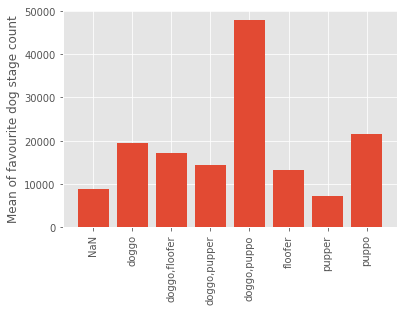

In [88]:
fig, ax= plt.subplots()
ax.bar(dog_fav_mean.index, dog_fav_mean)
ax.set_xticklabels(dog_fav_mean.index,rotation=90)
ax.set_ylabel('Mean of favourite dog stage count')
plt.savefig('plot1.png')
plt.show()

In [89]:
dog_ret_mean= df_twitter_data.groupby('dog_stage').retweetcount.mean()
dog_ret_mean

dog_stage
NaN               2688.487678
doggo             7125.698413
doggo,floofer     3433.000000
doggo,pupper      4844.714286
doggo,puppo      19196.000000
floofer           4968.714286
pupper            2399.343434
puppo             6473.954545
Name: retweetcount, dtype: float64

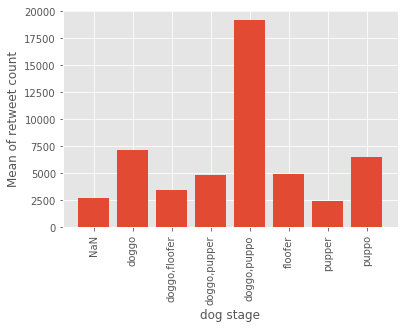

In [90]:
fig, ax= plt.subplots()
ax.bar(dog_ret_mean.index, dog_ret_mean)
ax.set_xticklabels(dog_ret_mean.index,rotation=90)
ax.set_ylabel('Mean of retweet count')
ax.set_xlabel('dog stage')
plt.savefig('plot2.png')
plt.show()

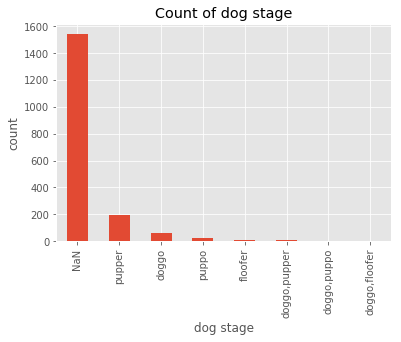

In [91]:
df_twitter_data['dog_stage'].value_counts().plot(kind='bar')
plt.title('Count of dog stage')
plt.xlabel('dog stage')
plt.ylabel('count');
plt.savefig('Count_of_dogstage.png')

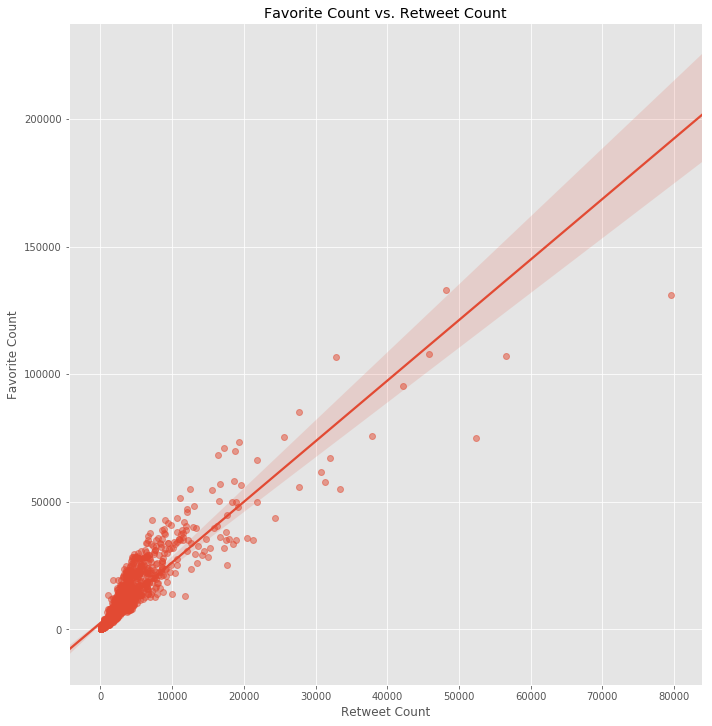

In [92]:
sns.lmplot(x="retweetcount", y="favouritecount",data=df_twitter_data, size = 10, scatter_kws={'alpha':0.5})
plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('Favorite_vs_Retweet.png')

## Storing the Final Dataframe into a CSV file

In [93]:
twitter_archive_master = df_twitter_data.copy()
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)